## Song Paintings Database

**Database Overview**

Total number of entries in the database

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path='SongPaintingData_APR15.csv'
df=pd.read_csv(csv_path)
print(len(paintings))

1463


Display first 10 rolls of the database

In [32]:
print(df.head(10))

   ID     Title Dynasty Artist            Format Material      H      W  \
0   1      溪山行旅     SS2   傳 范寬       squarish 方幅  Silk 絹本   23.9   25.5   
1   2    瀟湘八景圖1     SS2   傳 王洪      handscroll 卷  Silk 絹本   23.4   90.7   
2   3    瀟湘八景圖2     SS2   傳 王洪      handscroll 卷  Silk 絹本   23.4   90.7   
3   4    瀟湘八景圖3     SS2   傳 王洪      handscroll 卷  Silk 絹本   23.4   90.7   
4   5    瀟湘八景圖4     SS2   傳 王洪      handscroll 卷  Silk 絹本   23.4   90.7   
5   6       山水圖     NS2    李公年  hanging scroll 軸  Silk 絹本  130.0   48.4   
6   7       寒塘圖     SS2     梁楷       squarish 方幅  Silk 絹本   24.6   25.7   
7   8  仿周文矩 宮中圖     NaN     佚名      handscroll 卷  Silk 絹本   25.7  177.0   
8   9      山水舟遊     SS2   傳　馬遠  hanging scroll 軸  Silk 絹本  172.5   85.2   
9  10       陳風圖     SS2  傳　馬和之      handscroll 卷  Silk 絹本   26.7  739.0   

          A Size                                          Institute  \
0    609.45    S              Art Museum, Princeton University, USA   
1   2122.38    M              Ar

(array([1.012e+03, 1.560e+02, 5.500e+01, 2.200e+01, 1.600e+01, 1.000e+01,
        9.000e+00, 5.000e+00, 8.000e+00, 7.000e+00, 3.000e+00, 3.000e+00,
        4.000e+00, 5.000e+00, 1.000e+00, 7.000e+00, 5.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   7.3  ,   59.834,  112.368,  164.902,  217.436,  269.97 ,
         322.504,  375.038,  427.572,  480.106,  532.64 ,  585.174,
         637.708,  690.242,  742.776,  795.31 ,  847.844,  900.378,
         952.912, 1005.446, 1057.98 , 1110.514, 1163.048, 1215.582,
        1268.116, 1320.65 , 1373.184, 1425.718, 1478.252, 1530.786,
        1583.32 , 1635.854, 1688.388

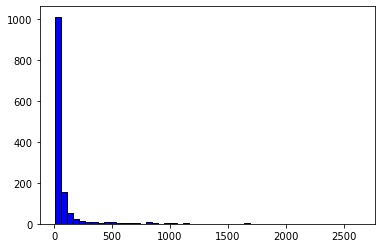

In [33]:
plt.hist(df['W'], color = 'blue', edgecolor = 'black',
         bins = int(50))

Show paintings with a width under 50cm and height under 50 cm.

In [4]:
df2 = df[df['W'] <= 50] 
df3 = df2[df2['H'] <= 50]
print (df3[['Title','W','H']])

                              Title     W     H
0                              溪山行旅  25.5  23.9
6                               寒塘圖  25.7  24.6
10    Mountain Terrace and Pavilion  24.6  24.6
11                     Winter Scene  24.0  24.0
12                              戲猿圖  26.5  24.8
...                             ...   ...   ...
1450                           楊柳乳雀  24.8  24.8
1451                             梅雀  29.0  25.5
1452                           竹樹馴雀  24.8  24.8
1453                           山茶宿鳥  25.6  24.3
1462                           嫩柳栖鴉  25.4  24.3

[655 rows x 3 columns]


In [5]:
df3 = df.loc[[1,10]]
print(df3)

    ID                          Title Dynasty Artist        Format Material  \
1    2                         瀟湘八景圖1     SS2   傳 王洪  handscroll 卷  Silk 絹本   
10  11  Mountain Terrace and Pavilion     NaN     佚名   squarish 方幅  Silk 絹本   

       H     W        A Size                              Institute  \
1   23.4  90.7  2122.38    M  Art Museum, Princeton University, USA   
10  24.6  24.6   605.16    S           Cleveland Museum of Art, USA   

   Nationality          Source Note Seals and Inscriptions      Set  \
1          USA      宋畫全集第六卷第六冊  NaN                    NaN  瀟湘八景圖四段   
10         USA  Museum Website  NaN                    NaN      NaN   

            Tag1 Tag2 Tag3 Tag4  
1            NaN  NaN  NaN  NaN  
10  architecture  NaN  NaN  NaN  


In [6]:
df4 = df.iloc[4, 1]
print (df4)

瀟湘八景圖4


In [7]:
y = df[['Title','Size']]
print (y)

       Title Size
0       溪山行旅    S
1     瀟湘八景圖1    M
2     瀟湘八景圖2    M
3     瀟湘八景圖3    M
4     瀟湘八景圖4    M
...      ...  ...
1458  宋寧宗后坐像    L
1459   宋理宗坐像    L
1460     畫羅漢  NaN
1461     赤壁圖    L
1462    嫩柳栖鴉    S

[1463 rows x 2 columns]


In [8]:
df1 = df[['Title',"W","H"]]
print (df1)

       Title      W      H
0       溪山行旅   25.5   23.9
1     瀟湘八景圖1   90.7   23.4
2     瀟湘八景圖2   90.7   23.4
3     瀟湘八景圖3   90.7   23.4
4     瀟湘八景圖4   90.7   23.4
...      ...    ...    ...
1458  宋寧宗后坐像  112.8  160.3
1459   宋理宗坐像  108.5  189.0
1460     畫羅漢    NaN    NaN
1461     赤壁圖  136.4   50.8
1462    嫩柳栖鴉   25.4   24.3

[1463 rows x 3 columns]
